In [1]:
import numpy as np

import pandas as pd
from collections import defaultdict
import string

# import keras
# from keras.layers import Dense, GlobalAveragePooling1D, Embedding, Lambda
# import keras.backend as K
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import Tokenizer
# from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
np.random.seed(1234)

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# specific_keywords = {
#     'HPL': {'aylesbury', 'miskatonic', 'gabinius', 'abdul', 'alhazred', 'arkham', 'armitage', 'azathoth', 'carter', 'celephaïs', 'cthulhu', 'cults', "d'auseil", 'dagon', 'dunwich', 'erich', 'fomalhaut', 'ghouls', 'herbert', 'hydra', 'ilek', 'innsmouth', 'kadath', 'kingsport', 'kulten', 'legrasse', 'necronomicon', 'newburyport', 'niggurath', 'nodens', 'nyarlathotep', 'obed', 'pickman', 'pnakotic', "r'lyeh", 'richard', 'shub', 'sothoth', 'ulthar', 'unaussprechlichen', 'upton', 'yog', 'zann', 'fhtagn', 'ph’nglui', "wgah’nagl", 'fhtagn'},
#     'EAP': set(),
#     'MWS': set()
# }

# vocab_by_author = {a : defaultdict(int) for a in set(df.author)}

# for t, a in zip(df.text, df.author):
#     for word in preprocess(t).lower().split():
#         vocab_by_author[a][word] += 1
# vocab_by_author.keys()

# uniq_vocab = set()
# for v in vocab_by_author.values():
#      uniq_vocab |= set(v.keys())
# print('all', len(uniq_vocab))
# pairs = [('MWS', 'EAP'), ('HPL', 'MWS'), ('HPL', 'EAP')]
        
# for a, b in pairs:
#     uniq_vocab -= (set(vocab_by_author[a].keys()) & set(vocab_by_author[b].keys()))
# len(uniq_vocab)

# for a, freq in vocab_by_author.items():
#     specific_vocab = set(freq.keys()) & uniq_vocab

#     d = {w: freq[w] for w in specific_vocab}
    
#     for word, f in sorted(d.items(), key=lambda x: -x[1]):
#         if f < 5:
#             break
#         specific_keywords[a].add(word)
#     print(a, len(specific_keywords[a]))


In [7]:
doc_lengths = {name : [] for name in set(df.author)}
words_sizes = {name : [] for name in set(df.author)}
preprocess_words_sizes =  {name : [] for name in set(df.author)}

for (text, author) in zip(df.text, df.author):
    doc_lengths[author].append(len(text))
    words_sizes[author].append(len(text.split()))
    preprocess_words_sizes[author].append(len(preprocess(text).split()))

In [9]:
names = []
lengths = []
word_sizes = []
pre_word_sizes = []

for name, data in doc_lengths.items():
    names.append(name)
    lengths.append(np.log(data))
    word_sizes.append(np.log(words_sizes[name]))
    pre_word_sizes.append(np.log(preprocess_words_sizes[name]))

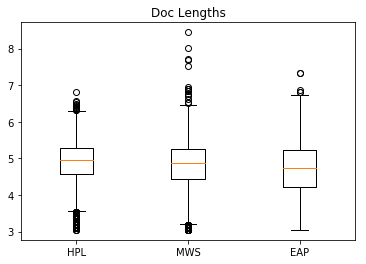

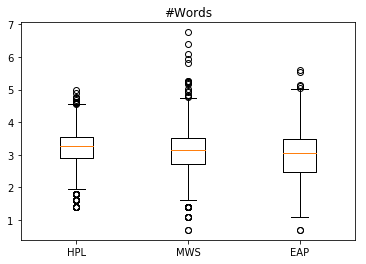

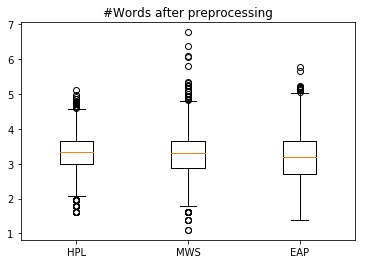

In [11]:
plt.boxplot(lengths, labels=names)
plt.title('Doc Lengths')
plt.show()
plt.boxplot(word_sizes, labels=names)
plt.title('#Words')
plt.show()
plt.boxplot(pre_word_sizes, labels=names)
plt.title('#Words after preprocessing')
plt.show()

In [242]:
# for t, a in zip(df.text, df.author):
#     prod = HPL_keywords & set(preprocess(t).lower().split())
    
#     if prod:
#         print(a)
#     prod = MWS & set(preprocess(t).lower().split())
#     if prod:
#         print(a)        

In [164]:
vocab = {a : set() for a in set(df.author)}

for t, a in zip(df.text, df.author):
    vocab[a] |= set(preprocess(t).lower().split())

In [165]:
vocab.keys()

dict_keys(['HPL', 'EAP', 'MWS'])

In [166]:
HPL = vocab['HPL']-vocab['EAP'] - vocab['MWS'] - HPL_keywords
HPL

{'increasingly',
 'sloping',
 'evoking',
 'abdomen',
 'crickets',
 'skeer',
 'gravestones',
 'terraqueous',
 'metabolism',
 'gallopin',
 'chide',
 'cartridge',
 'tendons',
 'offen',
 'peddler',
 'edw',
 'undreamable',
 'choke',
 'sumptuary',
 'undeniably',
 'glimpsed',
 'hooded',
 'buildin',
 'pryings',
 'transpositions',
 'shockingly',
 'cyclopean',
 'adjustments',
 'acherontic',
 'bassianus',
 'tracking',
 'bracelets',
 'cheapest',
 'whined',
 'reverberant',
 'passon',
 'dumb',
 'embankments',
 'velour',
 'polypheme',
 'tickle',
 'fungous',
 'peleg',
 'begotten',
 'ranger',
 'gnawed',
 'malevolently',
 'fulgurite',
 'lifelong',
 'grazed',
 'charred',
 'pliny',
 'realised',
 'stirs',
 'debris',
 'identifiable',
 'nis',
 'subtractions',
 'bestial',
 'mammals',
 'cropped',
 'lapel',
 'sorta',
 'mockingly',
 'archaeologists',
 'pitchers',
 'squeal',
 'listenin',
 'tram',
 'clusters',
 'colonists',
 'loot',
 'affliction',
 'yacht',
 'incests',
 'cupolas',
 'derided',
 'darkening',
 'bothe

In [388]:
EAP = vocab['EAP'] - vocab['MWS'] - vocab['HPL']

In [168]:
MWS = vocab['MWS'] - vocab['EAP'] - vocab['HPL']

## MWS seems to write longer articles?

In [17]:
counter = {name : defaultdict(int) for name in set(df.author)}
for (text, author) in zip(df.text, df.author):
    text = text.replace(' ', '')
    for c in text:
        counter[author][c] += 1
    

In [18]:
chars = set()
for v in counter.values():
    chars |= v.keys()
    
names = [author for author in counter.keys()]
special_latters = set()
print('c ', end='')
for n in names:
    print(n, end='   ')
print()
for c in chars:    
    print(c, end=' ')
    for n in names:
        print(counter[n][c], end=' ')
    print()
    special_latters.add(c)

c HPL   EAP   MWS   
â 0 6 0 
g 14951 16088 12601 
α 2 0 0 
ñ 7 0 0 
C 439 395 308 
u 19519 26311 21025 
æ 10 36 0 
h 42770 51580 43738 
M 645 1065 415 
I 3480 4846 4917 
ê 2 28 0 
ü 5 1 0 
x 1061 1951 1267 
N 345 411 204 
à 0 10 0 
r 40590 51221 44042 
U 94 166 46 
ï 7 0 0 
c 18338 24127 17911 
, 8581 17594 12045 
T 1583 2217 1230 
z 529 634 400 
S 841 729 578 
Y 111 282 234 
Æ 4 1 0 
n 50879 62636 50291 
δ 2 0 0 
k 5204 4277 3707 
ö 3 16 0 
o 50996 67145 53386 
î 0 1 0 
l 30273 35371 27819 
i 44250 60952 46080 
J 210 164 66 
R 237 258 385 
L 249 458 307 
Q 10 21 7 
q 779 1030 677 
H 741 864 669 
Σ 1 0 0 
v 6529 9624 7948 
P 320 442 365 
Ν 1 0 0 
Υ 1 0 0 
" 513 2987 1469 
X 5 17 4 
s 43915 53841 45962 
A 1167 1258 943 
F 269 383 232 
ç 0 1 0 
e 88259 114885 97515 
a 56815 68525 55274 
ë 12 0 0 
: 47 176 339 
Å 1 0 0 
b 10636 13245 9611 
' 1710 1334 476 
Z 51 23 2 
Π 1 0 0 
G 318 313 246 
m 17622 22792 20471 
t 62235 82426 63142 
K 176 86 35 
ä 6 1 0 
y 12534 17001 14877 
d 33366 36862

## 特徴とか

- MWSはasciiしか系しか使わない（イギリスの作家だから？、それ以外の2人は使い、アメリカ）
- 長い文書はMWSぽさがある
- イギリス英語だと多分MWSの可能性がある
- `HPL` 限定: `cthulhu`, `r\'lyeh`があり（softmaxなのであんまり聞かないっぽいが0.005くらい変わった。別でがんばったほうがいい


In [170]:
special_latters = special_latters - set(string.ascii_uppercase) - set(string.ascii_lowercase) - set(',.:;"\'?')

In [171]:
' '.join(special_latters)

'â Σ Ν α Υ ñ ç ë æ Å ê ü Π à ï ä Æ Ο δ é ö è î ô ἶ'

In [9]:
# for (text, author) in zip(df.text, df.author):
#     if len(set(text) & special_latters):
#         print(set(text) & special_latters, author, text)


In [10]:
def create_docs(df, n_gram_max=1):
    docs = []

    for i, text in enumerate(df.text):
    
        def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
#         text = text.lower()
        doc = preprocess(text).split()
        
        prod = special_latters & set(text)
        special_chars = ''
        if prod:
            for c in prod:
                freq = text.count(c)
                special_chars += (' {} '.format(c) * freq)            
                
        docs.append(' '.join(add_ngram(doc, n_gram_max)) + special_chars)
        
    return docs

In [11]:
docs = create_docs(df, n_gram_max=1)

In [12]:
tokenizer = Tokenizer(num_words=2, filters='', lower=False)
tokenizer.fit_on_texts(docs)

In [13]:
min_count = 3
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

In [14]:
tokenizer = Tokenizer(num_words=num_words, filters='', lower=False)
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)
maxlen = max([len(i) for i in  docs])
docs = pad_sequences(sequences=docs, maxlen=maxlen)

In [15]:
len(tokenizer.word_index)

27527

In [16]:
a2c = {'EAP': 0, 'HPL' : 1, 'MWS' : 2}

In [17]:
y = np.array([a2c[a] for a in df.author])
y = to_categorical(y)

In [18]:
input_dim = np.max(docs)+1
input_dim, maxlen

(12673, 863)

In [19]:
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
model.add(GlobalAveragePooling1D())
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# train validation case
epochs = 45
x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.15)

# n_samples = x_train.shape[0]
class_weight = {c : (n_samples/(np.sum(y_train, axis=0)[c] * 3)) for c in range(3)}

hist = model.fit(x_train, y_train,
                 batch_size=16,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[EarlyStopping(patience=4, monitor='val_loss')])

In [21]:
history = hist.history
for i in range(epochs):
    print('{0:2d}'.format(i), 
          '{0:.4f}'.format(history['loss'][i]), 
          '{0:.4f}'.format(history['acc'][i]),
          '{0:.4f}'.format(history['val_loss'][i]),
          '{0:.4f}'.format(history['val_acc'][i]))

In [22]:
model.fit(docs, y,
          batch_size=16,
          epochs=38)

Epoch 1/38
19579/19579 [==============================] - 13s - loss: 1.0845 - acc: 0.4035    
Epoch 2/38
19579/19579 [==============================] - 13s - loss: 1.0650 - acc: 0.4100    
Epoch 3/38
19579/19579 [==============================] - 13s - loss: 1.0125 - acc: 0.4870    
Epoch 4/38
19579/19579 [==============================] - 13s - loss: 0.9321 - acc: 0.6239    
Epoch 5/38
19579/19579 [==============================] - 12s - loss: 0.8458 - acc: 0.6969    
Epoch 6/38
19579/19579 [==============================] - 11s - loss: 0.7689 - acc: 0.7402    
Epoch 7/38
19579/19579 [==============================] - 11s - loss: 0.7049 - acc: 0.7600    
Epoch 8/38
19579/19579 [==============================] - 13s - loss: 0.6517 - acc: 0.7786    
Epoch 9/38
19579/19579 [==============================] - 13s - loss: 0.6070 - acc: 0.7906    
Epoch 10/38
19579/19579 [==============================] - 12s - loss: 0.5683 - acc: 0.8069    
Epoch 11/38
19579/19579 [========================

In [427]:
path = './fastText_submission_preprocess_min3_38epoch.csv'
df = pd.read_csv(path)
test_df = pd.read_csv('./test.csv')

In [432]:
with open('./fastText_submission_preprocess_min1_38epoch_post_.csv', 'w') as f:
    f.write('"id","EAP","HPL","MWS"\n')
    for (index, row), t in zip(df.iterrows(), test_df.text):
        uniq_words = set(preprocess(t.lower()).split())
        uniq_count =  defaultdict(int)
        
        for a, vocab in specific_keywords.items():
            for v in vocab & uniq_words:
                uniq_count[a] += 1
        
        if len(uniq_count) == 2:
            if max(uniq_count.items(), key=lambda x:x[1])[1] - min(uniq_count.items(), key=lambda x:x[1])[1] > 1:
                row['EAP'] = 0.
                row['HPL'] = 0.
                row['MWS'] = 0.
                row[max(uniq_count.items(), key=lambda x:x[1])[0]] = 1.
                print(uniq_count)

        elif len(uniq_count) == 1:
            row['EAP'] = 0.
            row['HPL'] = 0.
            row['MWS'] = 0.
            row[list(uniq_count.keys())[0]] = 1.


        


defaultdict(<class 'int'>, {'HPL': 5, 'EAP': 1})
"id24002",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 1, 'EAP': 3})
"id19664",1.0,0.0,0.0

defaultdict(<class 'int'>, {'HPL': 3, 'EAP': 1})
"id27282",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 3, 'MWS': 1})
"id03014",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 1, 'EAP': 5})
"id00678",1.0,0.0,0.0

defaultdict(<class 'int'>, {'HPL': 3, 'EAP': 1})
"id22472",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 3, 'EAP': 1})
"id17586",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 3, 'MWS': 1})
"id25656",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 4, 'EAP': 1})
"id21891",0.0,1.0,0.0

defaultdict(<class 'int'>, {'HPL': 1, 'MWS': 5})
"id20462",0.0,0.0,1.0

defaultdict(<class 'int'>, {'HPL': 3, 'EAP': 1})
"id12040",0.0,1.0,0.0



In [25]:
# min=3, ngram=1, preprocess upper special dim=20
# eppoh 40 since previous result is not good...
#  0 1.0850 0.4049 1.0836 0.3956
#  1 1.0712 0.4069 1.0606 0.4004
#  2 1.0345 0.4534 1.0106 0.4852
#  3 0.9730 0.5632 0.9461 0.6994
#  4 0.8981 0.6537 0.8724 0.6813
#  5 0.8266 0.7101 0.8100 0.7297
#  6 0.7616 0.7419 0.7553 0.7354
#  7 0.7062 0.7622 0.7082 0.7375
#  8 0.6593 0.7765 0.6712 0.7487
#  9 0.6175 0.7889 0.6459 0.7552
# 10 0.5819 0.8016 0.6050 0.7794
# 11 0.5499 0.8117 0.5821 0.7855
# 12 0.5203 0.8223 0.5597 0.7943
# 13 0.4948 0.8312 0.5376 0.8076
# 14 0.4708 0.8374 0.5244 0.7967
# 15 0.4487 0.8470 0.5050 0.8056
# 16 0.4271 0.8560 0.4888 0.8127
# 17 0.4090 0.8631 0.4737 0.8236
# 18 0.3924 0.8662 0.4667 0.8189
# 19 0.3748 0.8777 0.4560 0.8325
# 20 0.3588 0.8832 0.4484 0.8226
# 21 0.3439 0.8889 0.4312 0.8362
# 22 0.3310 0.8918 0.4222 0.8464
# 23 0.3188 0.8966 0.4131 0.8427
# 24 0.3067 0.9011 0.4124 0.8454
# 25 0.2950 0.9049 0.3990 0.8437
# 26 0.2840 0.9101 0.4031 0.8352
# 27 0.2742 0.9129 0.3872 0.8492
# 28 0.2654 0.9164 0.3899 0.8512
# 29 0.2556 0.9201 0.4037 0.8386
# 30 0.2460 0.9215 0.3792 0.8515
# 31 0.2386 0.9253 0.3867 0.8468
# 32 0.2311 0.9283 0.3736 0.8573
# 33 0.2234 0.9314 0.3673 0.8563
# 34 0.2164 0.9317 0.3644 0.8550
# 35 0.2094 0.9346 0.3664 0.8570
# 36 0.2034 0.9376 0.3641 0.8556
# 37 0.1969 0.9395 0.3595 0.8614
# 38 0.1908 0.9407 0.3517 0.8611
# 39 0.1856 0.9435 0.3543 0.8614 
# 40 0.1802 0.9441 0.3498 0.8624 xxx
# 41 0.1759 0.9441 0.3829 0.8529
# 42 0.1697 0.9475 0.3641 0.8587
# 43 0.1656 0.9490 0.3558 0.8652
# 44 0.1604 0.9521 0.3854 0.8495